# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
!pip install citipy

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)

In [29]:
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
#constructing the url
#lat=35&lon=139
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&"
query_url = url + "appid=" + api_key +"&q="


In [10]:
# response = requests.get(f"{query_url}{city}").json()
# response

In [32]:
city_api_list = []
new_city_list = []
count = 0
print("Beginning Data Retrievel")
print("__________________________________")
for city in cities:
    count += 1
    request = requests.get(query_url + city)
    try:
        city_info = request.json()
    except KeyError:
        print("City not found. Skipping data.")
    if city_info != {'cod': '404', 'message': 'city not found'}:
        city_api_list.append(city_info)
        new_city_list.append(city)
        print(f"Processing Record {count} of {city_count}: {city}")
    else: 
        print(f"Skipping Record {count}: {city}")
    

print("-----------------------------")
print("Data Retrievel Complete")
print("-----------------------------")

Beginning Data Retrievel
__________________________________
Processing Record 1 of 602: panguna
Processing Record 2 of 602: yellowknife
Skipping Record 3: illoqqortoormiut
Processing Record 4 of 602: vaini
Processing Record 5 of 602: albany
Processing Record 6 of 602: prince george
Processing Record 7 of 602: port alfred
Processing Record 8 of 602: vranje
Processing Record 9 of 602: mahebourg
Processing Record 10 of 602: ushuaia
Processing Record 11 of 602: chokurdakh
Processing Record 12 of 602: kapuskasing
Processing Record 13 of 602: cabo san lucas
Processing Record 14 of 602: chumikan
Processing Record 15 of 602: georgetown
Processing Record 16 of 602: nadym
Processing Record 17 of 602: longyearbyen
Processing Record 18 of 602: carnarvon
Processing Record 19 of 602: punta arenas
Processing Record 20 of 602: san quintin
Processing Record 21 of 602: luanda
Processing Record 22 of 602: romny
Processing Record 23 of 602: hamilton
Processing Record 24 of 602: lebu
Processing Record 25 o

Processing Record 216 of 602: shimoda
Processing Record 217 of 602: nikolskoye
Processing Record 218 of 602: buraydah
Processing Record 219 of 602: nkowakowa
Processing Record 220 of 602: bathsheba
Processing Record 221 of 602: hofn
Skipping Record 222: akyab
Processing Record 223 of 602: pisco
Processing Record 224 of 602: la mana
Processing Record 225 of 602: amapa
Processing Record 226 of 602: mount darwin
Processing Record 227 of 602: jieshou
Processing Record 228 of 602: pevek
Processing Record 229 of 602: gornopravdinsk
Skipping Record 230: satitoa
Processing Record 231 of 602: talcahuano
Processing Record 232 of 602: sola
Skipping Record 233: barentsburg
Processing Record 234 of 602: port blair
Skipping Record 235: belushya guba
Processing Record 236 of 602: la ronge
Processing Record 237 of 602: moussoro
Processing Record 238 of 602: kuminskiy
Processing Record 239 of 602: skibbereen
Processing Record 240 of 602: sitka
Processing Record 241 of 602: erzin
Processing Record 242 o

Processing Record 431 of 602: samarai
Processing Record 432 of 602: scottsbluff
Processing Record 433 of 602: hays
Processing Record 434 of 602: roura
Processing Record 435 of 602: la orilla
Processing Record 436 of 602: ulety
Processing Record 437 of 602: borazjan
Processing Record 438 of 602: saurimo
Processing Record 439 of 602: tornio
Processing Record 440 of 602: rio grande
Processing Record 441 of 602: maniitsoq
Processing Record 442 of 602: bilibino
Processing Record 443 of 602: kununurra
Processing Record 444 of 602: salalah
Processing Record 445 of 602: havre-saint-pierre
Skipping Record 446: marcona
Processing Record 447 of 602: grindavik
Processing Record 448 of 602: skjervoy
Processing Record 449 of 602: calamar
Skipping Record 450: catamarca
Processing Record 451 of 602: batagay-alyta
Processing Record 452 of 602: hami
Processing Record 453 of 602: mandalgovi
Processing Record 454 of 602: roswell
Skipping Record 455: mooi river
Processing Record 456 of 602: polunochnoye
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
city_api_dict = {}
count = 0
cities_df = pd.DataFrame(columns=['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'], index=new_city_list)
while count<len(new_city_list):
  for city in city_api_list[0+count:1+count]:
      count += 1
      city_dict = {
          'City' : city['name'],
          'Cloudiness' : city['clouds']['all'],
          'Country' : city['sys']['country'],
          'Date' : city['dt'],
          'Humidity' : city['main']['humidity'],
          'Lat' : city['coord']['lat'],
          'Lng' : city['coord']['lon'],
          'Max Temp' : city['main']['temp_max'],
          'Wind Speed' : city['wind']['speed']
          }
      cities_df.loc[city_dict['City'].lower(), :] = city_dict

In [34]:
cities_df = cities_df.reset_index(drop=True)

In [35]:
cities_df.to_csv('weather_data.csv')

In [38]:
cities_df.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [39]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Panguna,64,PG,1552023841,86,-6.32,155.48,27.62,1.51
1,Yellowknife,5,CA,1552023546,84,62.45,-114.38,-16.67,2.1
2,Vaini,0,IN,1552021200,15,15.34,74.49,32,3.1
3,Albany,20,US,1552023660,56,42.65,-73.75,-8.89,1.5
4,Prince George,1,CA,1552023619,92,53.92,-122.75,-4.44,0.91


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

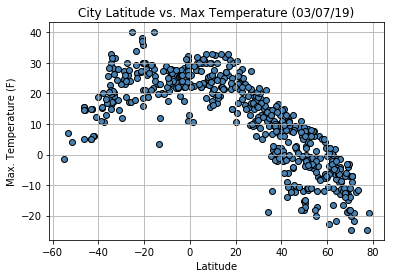

In [45]:
plt.scatter(cities_df["Lat"],cities_df["Max Temp"], color="steelblue", edgecolor="Black")
plt.grid(True)
plt.title("City Latitude vs. Max Temperature (03/07/19)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

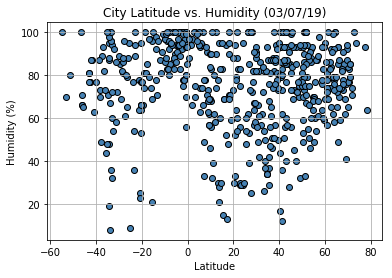

In [46]:
plt.scatter(cities_df["Lat"],cities_df["Humidity"], color="steelblue", edgecolor="Black")
plt.grid(True)
plt.title("City Latitude vs. Humidity (03/07/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

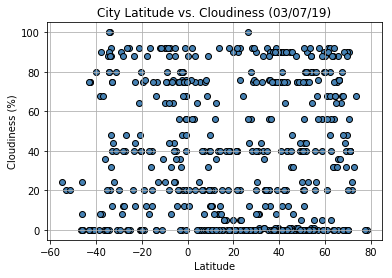

In [47]:
plt.scatter(cities_df["Lat"],cities_df["Cloudiness"], color="steelblue", edgecolor="Black")
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (03/07/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

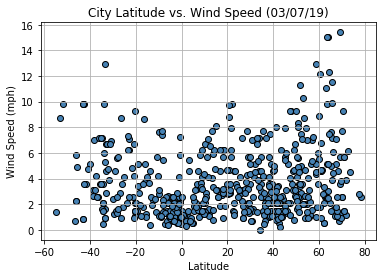

In [48]:
plt.scatter(cities_df["Lat"],cities_df["Wind Speed"], color="steelblue", edgecolor="Black")
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (03/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()
